In [18]:
import os
import sys
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import utils.csv as csv
import utils.plot as plot
import utils.shp as shp

In [15]:
PATH='D:\\Deutschland\\FUB\\master_thesis\\data'
LABEL_PATH = os.path.join(PATH, 'ref', 'validation', 'multi_aoi.csv')
SHP_PATH = os.path.join(PATH,'Reference_data','validation', 'aoi_polygons.shp')

In [ ]:
polygons = shp.load_shp_file(SHP_PATH)
polygons

In [39]:
aoi = csv.load(LABEL_PATH, 'id')
aoi['Spruce'] = 1
aoi['Pine'] = 1
aoi['Beech'] = 1
aoi

,Spruce,Silver Fir,Douglas Fir,Pine,Oak,Beech,Sycamore
id,,,,,,,
101117,1,0,0,1,0,1,0
101158,1,0,0,1,0,1,0
101583,1,0,0,1,0,1,0
101592,1,0,0,1,0,1,0
101607,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
97749,1,0,0,1,0,1,0
97750,1,0,0,1,0,1,0
97754,1,0,0,1,0,1,0


In [40]:
gdf = pd.merge(polygons, aoi, on='id', how='inner')
gdf

,BST1_BA_1,BST1_BA_2,BST1_BA_3,BST1_BA_4,BST1_BA_5,BST1_BA_6,BST1_BA_7,BST1_BA_8,BST1_BAA_1,BST1_BAA_2,...,id,Location,geometry,Spruce,Silver Fir,Douglas Fir,Pine,Oak,Beech,Sycamore
0,710,210,872,871,821,980,310,410,70,15,...,92986,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.91691 47.99494, 7.91694 47.99494, ...",1,0,0,1,0,1,0
1,710,210,821,310,620,831,950,851,35,25,...,93392,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.90146 48.00070, 7.90146 48.00072, ...",1,0,0,1,0,1,0
2,710,210,821,310,620,831,950,851,35,25,...,94394,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.90542 48.00223, 7.90544 48.00220, ...",1,0,0,1,0,1,0
3,821,110,310,0,0,0,0,0,100,0,...,95073,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.90416 48.00888, 7.90425 48.00887, ...",1,0,0,1,0,1,0
4,620,821,851,710,210,310,0,0,50,40,...,95104,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.90700 47.99695, 7.90702 47.99699, ...",1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,410,310,822,882,630,960,500,910,95,5,...,417842,Hardtwald_pine_beech_redoak,"POLYGON ((8.43677 49.07046, 8.43701 49.07223, ...",1,0,0,1,0,1,0
354,710,410,882,630,821,600,110,0,60,40,...,417989,Hardtwald_pine_beech_redoak,"POLYGON ((8.44921 49.07403, 8.44776 49.07475, ...",1,0,0,1,0,1,0
355,410,630,710,882,600,310,930,6,90,5,...,418005,Hardtwald_pine_beech_redoak,"POLYGON ((8.44596 49.06969, 8.44386 49.07007, ...",1,0,0,1,0,1,0
356,410,979,630,910,810,110,600,310,100,0,...,418040,Hardtwald_pine_beech_redoak,"POLYGON ((8.43642 49.08011, 8.43634 49.07997, ...",1,0,0,1,0,1,0


In [45]:
tree_types = ['Spruce', 'Silver Fir', 'Douglas Fir', 'Pine', 'Oak', 'Beech', 'Sycamore']
# 定义符号形状和颜色
marker_shapes = {
                'Spruce':'o',
                'Silver Fir':'s',
                'Douglas Fir':'^',
                'Pine':'v', 
                'Oak':'p',
                'Beech':'h', 
                'Sycamore':'X'
                }
marker_colors = {
                'Spruce':'#1f77b4',
                'Silver Fir':'#ff7f0e',
                'Douglas Fir':'#2ca02c',
                'Pine':'#d62728', 
                'Oak':'#9467bd',
                'Beech':'#e377c2', 
                'Sycamore':'#7f7f7f'
                }
# 定义一个函数，根据不同的树木种类绘制不同的符号
def plot_tree_types(row, ax, radius_scale=0.5):
    # 提取polygon的几何中心点
    centroid = row['geometry'].centroid

    # 计算绘制多个符号的角度和半径
    num_trees = row[tree_types].sum()
    angle_step = 2 * np.pi / num_trees
    radius = row['geometry'].area ** 0.5 / 4 * radius_scale

    # 遍历polygon的树木种类
    angle = 0
    for tree_type in tree_types:
        if row[tree_type]:
            # 计算符号的坐标
            x = centroid.x + radius * np.cos(angle)
            y = centroid.y + radius * np.sin(angle)

            # 绘制相应的符号
            ax.plot(x, y, marker=marker_shapes[tree_type], color=marker_colors[tree_type], markersize=8, markeredgewidth=1, markeredgecolor='black')

            # 更新角度
            angle += angle_step

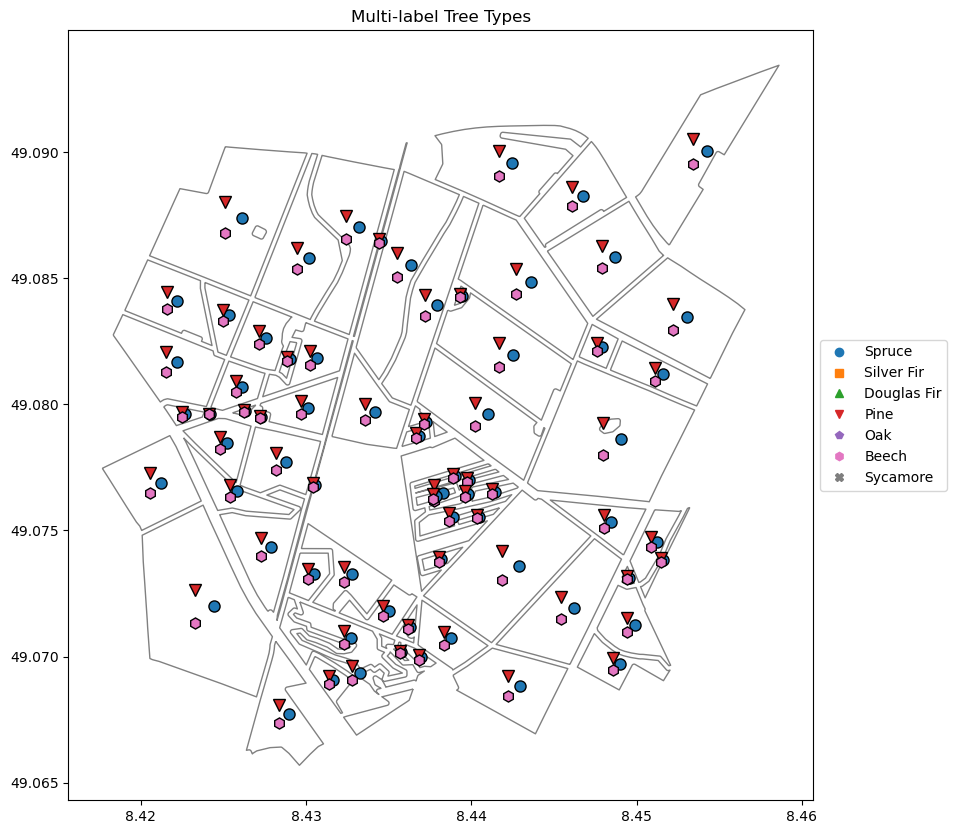

In [46]:
# 创建一个绘图对象
fig, ax = plt.subplots(figsize=(10, 10))
# Karlsruhe
aoi_1 = gdf[gdf['Location'] == 'Hardtwald_pine_beech_redoak']
# 绘制polygon图层
aoi_1.boundary.plot(ax=ax, color='gray', linewidth=1)

# 对于每个polygon，绘制多个符号
aoi_1.apply(lambda row: plot_tree_types(row, ax), axis=1)

# 设置标题和显示图形
ax.set_title('Multi-label Tree Types')
handles = [plt.Line2D([], [], color=marker_colors[label], marker=marker_shapes[label], linestyle='', label=label) for label in tree_types]
ax.legend(handles=handles, labels=tree_types, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

AOI SHP Generation

In [19]:
import geopandas as gpd
import utils.shp as shp
from geopandas.tools import sjoin
file_path = os.path.join(PATH, 'Reference_data', 'bw_all_polygons', 'buffered_wgs_bw_polygons.shp')
aoi_path = os.path.join(PATH, 'Reference_data', 'validation', 'Objectbased_classification_regression_validation2.shp')
out_path = os.path.join(PATH, 'Reference_data', 'validation', 'aoi_polygons.shp')

In [9]:
polygons = shp.load_shp_file(file_path)
polygons

import file D:\Deutschland\FUB\master_thesis\data\Reference_data\validation\Objectbased_classification_regression_validation2.shp
import file D:\Deutschland\FUB\master_thesis\data\Reference_data\bw_all_polygons\buffered_wgs_bw_polygons.shp


,BST1_BA_1,BST1_BA_2,BST1_BA_3,BST1_BA_4,BST1_BA_5,BST1_BA_6,BST1_BA_7,BST1_BA_8,BST1_BAA_1,BST1_BAA_2,...,BST3_BAA_1,BST3_BAA_2,BST3_BAA_3,BST3_BAA_4,BST3_BAA_5,BST3_BAA_6,BST3_BAA_7,BST3_BAA_8,id,geometry
0,110,943,920,979,0,0,0,0,100,0,...,0,0,0,0,0,0,0,0,1,"POLYGON ((9.71275 48.83270, 9.71276 48.83275, ..."
1,110,831,600,710,920,0,0,0,95,5,...,0,0,0,0,0,0,0,0,2,"POLYGON ((9.71103 48.82652, 9.71106 48.82653, ..."
2,110,831,820,921,710,979,0,0,60,20,...,0,0,0,0,0,0,0,0,3,"POLYGON ((9.71794 48.83711, 9.71794 48.83712, ..."
3,110,710,831,0,0,0,0,0,60,40,...,0,0,0,0,0,0,0,0,4,"POLYGON ((9.71427 48.82590, 9.71429 48.82593, ..."
4,110,831,710,821,930,600,210,0,40,30,...,0,0,0,0,0,0,0,0,5,"POLYGON ((9.71447 48.82624, 9.71446 48.82625, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283607,410,710,600,310,810,910,0,0,50,40,...,0,0,0,0,0,0,0,0,418137,"MULTIPOLYGON (((8.62672 49.34822, 8.62517 49.3..."
283608,410,710,600,910,810,0,0,0,70,20,...,0,0,0,0,0,0,0,0,418139,"POLYGON ((8.61916 49.35218, 8.61918 49.35221, ..."
283609,410,710,6,810,110,881,600,821,70,30,...,0,0,0,0,0,0,0,0,418141,"POLYGON ((8.61311 49.33944, 8.61375 49.33975, ..."
283610,710,831,410,600,810,110,822,630,45,20,...,0,0,0,0,0,0,0,0,418142,None


In [15]:
aoi = shp.load_shp_file(aoi_path)
aoi.drop(columns=['id'], inplace=True)
aoi = shp.reproject(aoi)
aoi

import file D:\Deutschland\FUB\master_thesis\data\Reference_data\validation\Objectbased_classification_regression_validation2.shp
Reproject to EPSG:4326


,Location,geometry
0,Hardtwald_pine_beech_redoak,"POLYGON ((8.42299 49.08763, 8.45038 49.08776, ..."
1,Schwarzwald_spruce_silverfir_douglasfir,"POLYGON ((7.90144 48.00939, 7.92825 48.00964, ..."
2,schoenbuch_beech_oak_mixture,"POLYGON ((8.93597 48.59956, 8.96309 48.59958, ..."


In [23]:
assert polygons.crs == aoi.crs, "Coordinate Reference Systems (CRS) must match"
val_polygons = sjoin(polygons, aoi, how='inner', op='intersects')
val_polygons.drop(columns=['index_right'], inplace=True)
shp.export_shp_file(val_polygons, out_path)
shp.export_csv_reference(val_polygons, LABEL_PATH)

d:\LenovoSoftstore\Anaconda\envs\yolov5\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


export file D:\Deutschland\FUB\master_thesis\data\Reference_data\validation\aoi_polygons.shp
export file D:\Deutschland\FUB\master_thesis\data\ref\validation\label_aoi.csv
